# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Summer.csv")

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df['City']

0        Athens
1        Athens
2        Athens
3        Athens
4        Athens
          ...  
31160    London
31161    London
31162    London
31163    London
31164    London
Name: City, Length: 31165, dtype: object

In [7]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### 1. In how many cities Summer Olympics is held so far?

In [8]:
len(df['City'].unique())

22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [9]:
s= df['Medal'] == 'Gold'
df.loc[s]['Sport'].value_counts().sort_values(ascending = False).head(5)

Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

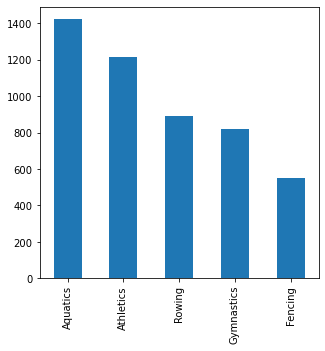

In [11]:
df.loc[s]['Sport'].value_counts().sort_values(ascending = False).head(5).plot.bar(figsize=(5,5))

### 3. Which sport is having most number of medals so far? (Top 5)

In [12]:
df.groupby('Sport').Medal.count().sort_values(ascending = False).head(5)

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

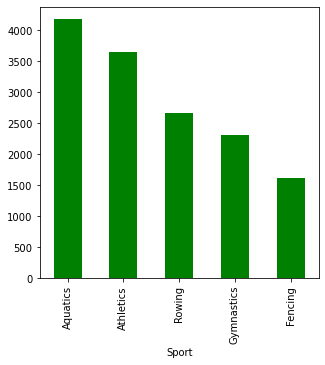

In [13]:
df.groupby('Sport').Medal.count().sort_values(ascending = False).head(5).plot.bar(figsize=(5,5), color="Green")

### 4. Which player has won most number of medals? (Top 5)

In [14]:
df.groupby('Athlete').Medal.count().sort_values(ascending= False).head(5)

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

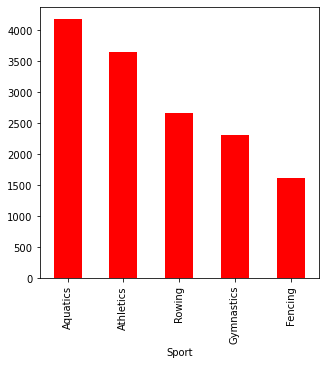

In [15]:
df.groupby('Sport').Medal.count().sort_values(ascending = False).head(5).plot.bar(figsize=(5,5),color="Red")

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [16]:
s= df['Medal'] == 'Gold'
df.loc[s]['Athlete'].value_counts().sort_values(ascending= False).head(5)

PHELPS, Michael     18
LEWIS, Carl          9
LATYNINA, Larisa     9
NURMI, Paavo         9
SPITZ, Mark          9
Name: Athlete, dtype: int64

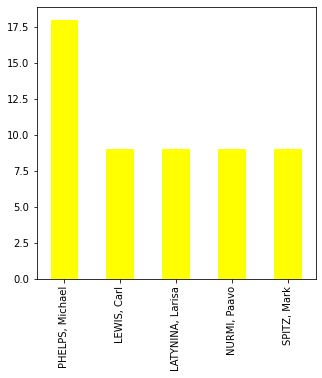

In [17]:
df.loc[s]['Athlete'].value_counts().sort_values(ascending= False).head(5).plot.bar(figsize=(5,5),color="Yellow")

### 6. In which year India won first Gold Medal in Summer Olympics?

In [18]:
filt = (df['Country'] == 'IND')&(df['Medal'] =='Gold')
df.loc[filt,'Year'].value_counts().sort_values(ascending = False).tail(7)

1956    17
1980    16
1928    15
1964    15
1952    14
1932    11
2008     1
Name: Year, dtype: int64

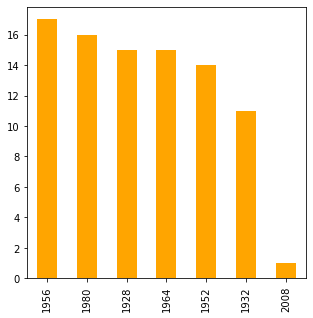

In [19]:
filt = (df['Country'] == 'IND')&(df['Medal'] =='Gold')
df.loc[filt,'Year'].value_counts().sort_values(ascending = False).tail(7).plot.bar(figsize=(5,5), color="Orange")

### 7. Which event is most popular in terms on number of players? (Top 5)

In [20]:
df.groupby('Event').Athlete.count().sort_values(ascending= False).head(5)

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

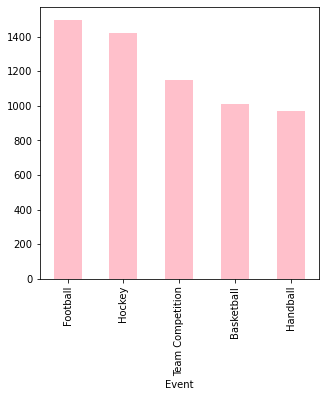

In [21]:
df.groupby('Event').Athlete.count().sort_values(ascending= False).head(5).plot.bar(figsize=(5,5),color="Pink")

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [22]:
filt = (df['Gender'] == 'Women')&(df['Medal'] =='Gold')
df.loc[filt ,'Sport'].value_counts().sort_values(ascending = False).head(5)

Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64

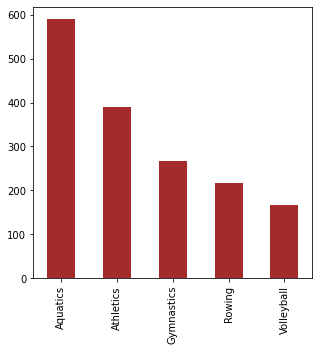

In [23]:
df.loc[filt ,'Sport'].value_counts().sort_values(ascending = False).head(5).plot.bar(figsize=(5,5), color="Brown")